## Documentation
Requirements:

get keras-segmentation with 'pip install keras-segmentation'. Refer to documentation https://github.com/divamgupta/image-segmentation-keras

Useful tutorials:

https://divamgupta.com/image-segmentation/2019/06/06/deep-learning-semantic-segmentation-keras.html


Directory structure:
TODO

### Handseg dataset:
Width: 640, Height: 480. The annotated images contain three classes: background: 0, right_hand: 1, left_hand: 2.

Accessing the data:

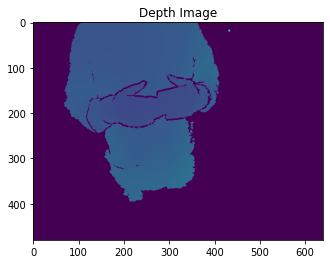

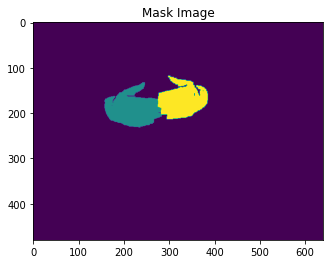

1


In [18]:
#path to the dataset
handseg_path = '../../handseg-150k'
depth_im = np.array(Image.open(Path(handseg_path+'/images/user-2.00000000.png')))# Loading depth image
mask_im = np.array(Image.open(Path(handseg_path+'/masks/user-2.00000000.png')))#  Loading mask image
depth_im = depth_im.astype(np.float32)# Converting to float
mean_depth_ims = 10000.0 # Mean value of the depth images
depth_im /= mean_depth_ims # Normalizing depth image
plt.imshow(depth_im); plt.title('Depth Image'); plt.show() # Displaying Depth Image
plt.imshow(mask_im); plt.title('Mask Image'); plt.show() # Displaying Mask Image

print(mask_im[200,200])

In [1]:
#Library header
from PIL import Image
from matplotlib import pyplot as plt
from pathlib import Path
import numpy as np

#load predefined model, like segnet with:
from keras_segmentation.models.segnet import segnet #vanilla segnet

#globals
input_width = 640
input_height = 480
handseg_path = '../../handseg-150k'

In [21]:
import shutil #library for moving files
import glob #for accessing the file paths
#create directories for test data and place images there
#separation: 70% train data and 30% test data
destination_data = Path(handseg_path+'/test_images')
destination_label = Path(handseg_path+'/test_masks')

#load all file names into a list
file_paths = glob.glob(handseg_path+"/images/*.png")
label_paths = glob.glob(handseg_path+"/masks/*.png")

#define amount of file for test data set
#amount_test_data = 158000*0.3

#for the data images
'''for path in file_paths:
    if amount_test_data > 0:
        shutil.move(path, destination_data)
        amount_test_data = amount_test_data - 1
    else:
        break'''

amount_test_data = 158000*0.3

#for the labeled data
for path in label_paths:
    if amount_test_data > 0:
        shutil.move(path, destination_label)
        amount_test_data = amount_test_data - 1
    else:
        break

Verifying training dataset


100%|██████████████████████████████████████████████████████████████████████████| 110915/110915 [44:13<00:00, 41.79it/s]

Dataset verified! 
Instructions for updating:
Please use Model.fit, which supports generators.


Epoch 1/5
512/512 [==============================] - 5369s 10s/step - loss: 1.1599 - accuracy: 0.5685
Epoch 2/5
512/512 [==============================] - 5362s 10s/step - loss: 1.0633 - accuracy: 0.6593
Epoch 3/5
512/512 [==============================] - 5368s 10s/step - loss: 1.0142 - accuracy: 0.7160
Epoch 4/5
512/512 [==============================] - 5324s 10s/step - loss: 0.9570 - accuracy: 0.7536
Epoch 5/5
512/512 [==============================] - 5329s 10s/step - loss: 0.8890 - accuracy: 0.7886


6042it [2:23:03,  1.57s/it]

KeyboardInterrupt: 

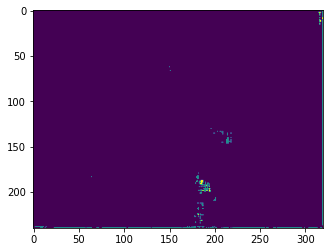

In [6]:
#load model
#three classes: background: 0, right_hand: 1, left_hand: 2
segnet_model = segnet(n_classes=3, input_width=input_width, input_height=input_height)

#train model
segnet_model.train(
    train_images =  handseg_path+'/images/',
    train_annotations = handseg_path+'/masks/',
    checkpoints_path = '../../tmp/segnet', 
    epochs=5
)

#predict model -> got one input image from the psl_kinect dataset
out = segnet_model.predict_segmentation(
    inp=handseg_path+'/predict/recon_30.png',
    out_fname="../../tmp/out.png"
)

#visualization
plt.imshow(out)

#evaluate model with test data
print(segnet_model.evaluate_segmentation( inp_images_dir=handseg_path+'/test_images'  , annotations_dir=handseg_path+'/test_masks' ) )